# Generate Figures for Paper

### Standard imports

In [2]:
import os
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from scipy.optimize import curve_fit
import scipy.stats

import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.colors import ListedColormap
from matplotlib import cm, transforms
import pandas as pd

### Additional imports

https://github.com/aewallin/allantools

In [3]:
import allantools

### Figure formating 

In [4]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 7),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'text.usetex': False,
          'font.family': "sans-serif",
          'font.sans-serif': ["Arial"],
          'figure.titlesize': large}
plt.rcParams.update(params)


## Figure 1

no data only drawings

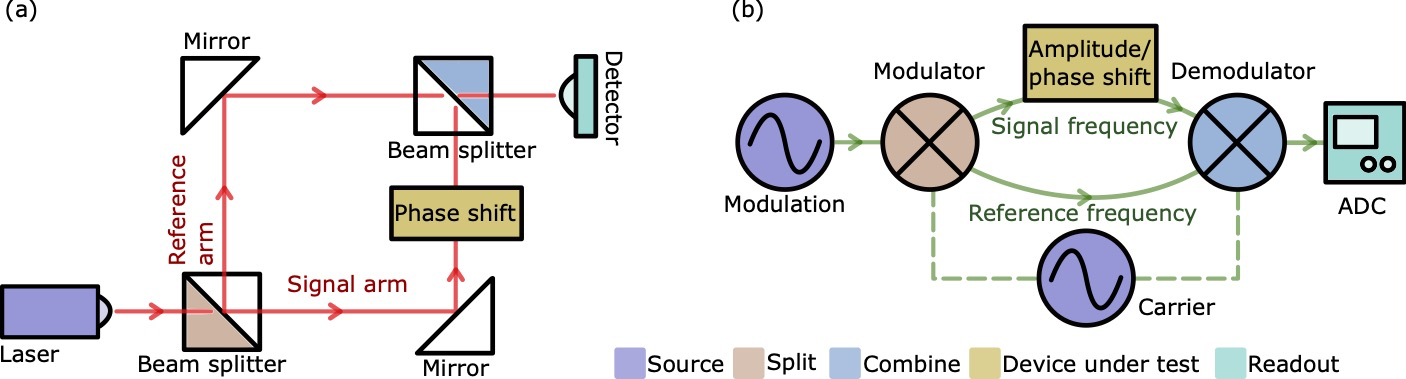

## Figure 2

no data only drawings

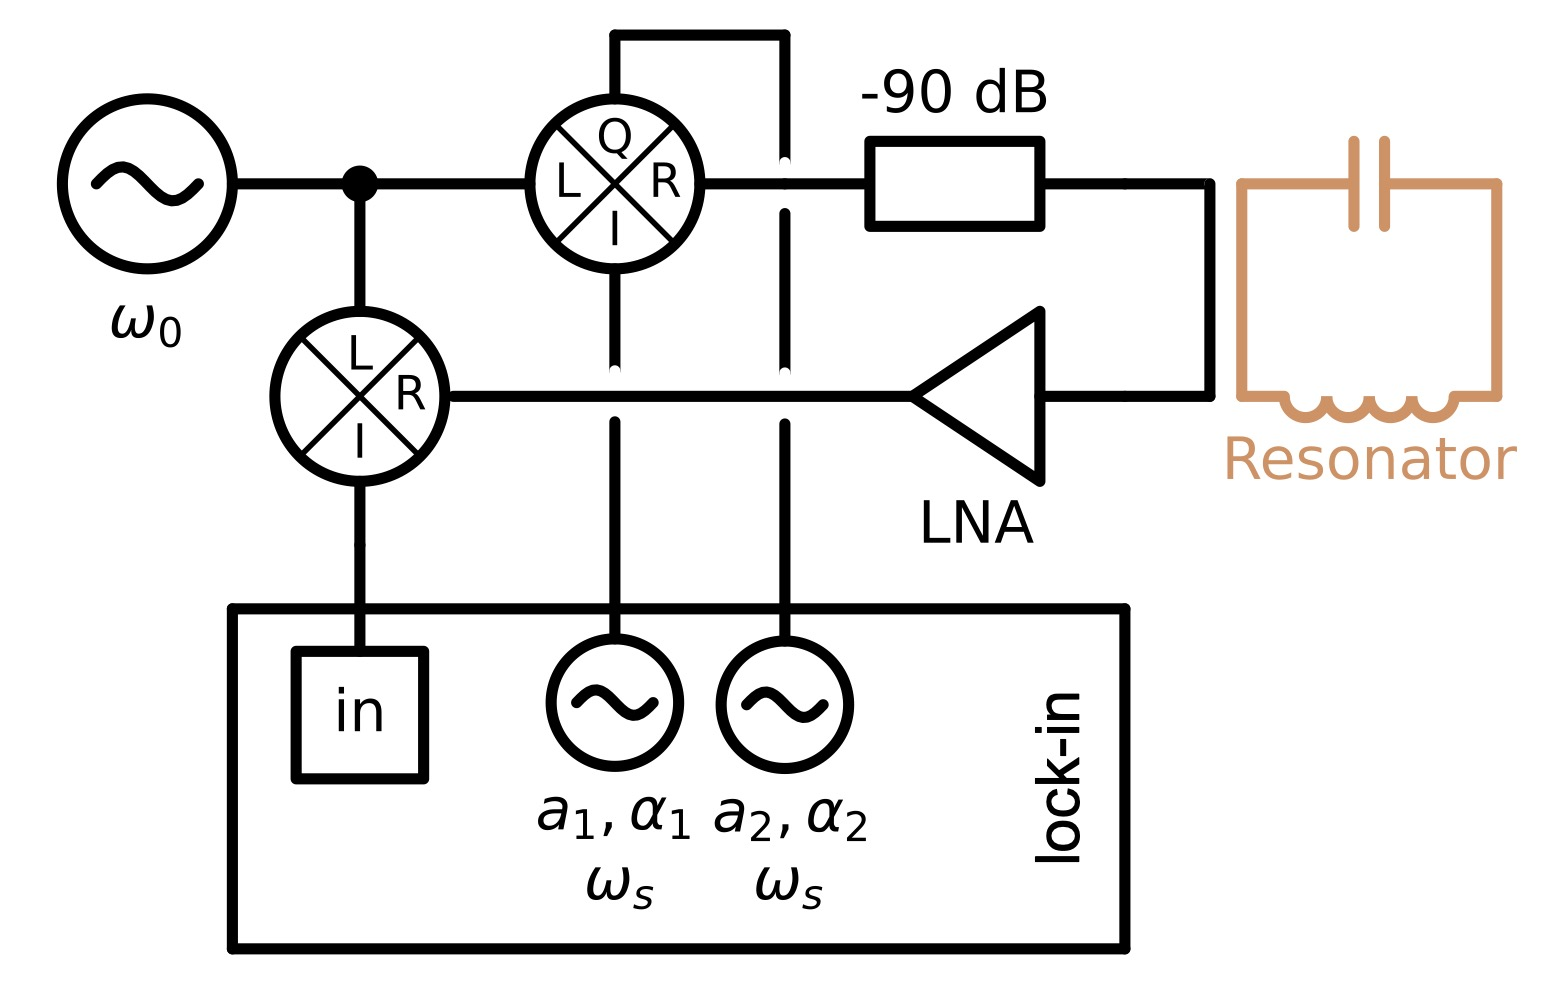

## Figure 3

Interference of the down-converted signal in the com- plex plane.

### Model

In [5]:
def getinterference(exp, angle=0): # model from paper, requires dictionary exp with parameters, returns I1,..., I4, Q1,..., Q4
    a1=exp['a1']
    a2=exp['a2']
    alpha1=exp['alpha1']
    alpha2=exp['alpha2']
    chi1=exp['chi1']
    chi2=exp['chi2']
    delta=exp['delta']
    c=exp['c']
    eps=exp['eps']
    I1 = a1*np.cos(alpha1+delta-chi1+angle)
    I2 = c*a1*np.cos(alpha1-delta+chi2+eps+angle)
    I3 = a2*np.cos(alpha2+delta-chi1+angle)
    I4 = -c*a2*np.cos(alpha2-delta+chi2+eps+angle)   
    Q1 = a1*np.sin(alpha1+delta-chi1+angle)
    Q2 = c*a1*np.sin(alpha1-delta+chi2+eps+angle)
    Q3 = a2*np.sin(alpha2+delta-chi1+angle)
    Q4 = -c*a2*np.sin(alpha2-delta+chi2+eps+angle)
    return I1,I2,I3,I4,Q1,Q2,Q3,Q4

def dalpha(exp):
    return np.arccos(-(1-exp['c']**2)*(exp['a1']**2+exp['a2']**2)/(1+exp['c']**2)/2/exp['a1']/exp['a2'])

### Figure style

In [ ]:
#font = {'family' : 'arial',
#        'weight': 'normal',
#        'size'   : 22}
#
#plt.rc('font', **font)
#
#SMALL_SIZE = 22
#MEDIUM_SIZE = 24
#BIGGER_SIZE = 24
#
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('lines', linewidth=3)
#
#
#plt.rcParams['mathtext.default'] = 'regular'

### Fig 3(a)

In [7]:
# choose optimal theta from equation.
a1 = 1.0
a2 = 1.0
c = 0.4
eps = 0.3
delta = 0
alpha1 = 0.3
alpha2 = 0.0
chi1 = 0
chi2 = 0
exp = {'a1':a1, 'a2':a2, 'alpha1':alpha1, 'alpha2':alpha2, 'chi1':chi1, 'chi2':chi2, 'delta':delta, 'c':c, 'eps':eps}
tg = dalpha(exp)
alpha2 = alpha1+tg
exp['alpha2'] = exp['alpha1']+tg
print(alpha2)

2.680579899365063


In [8]:
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)

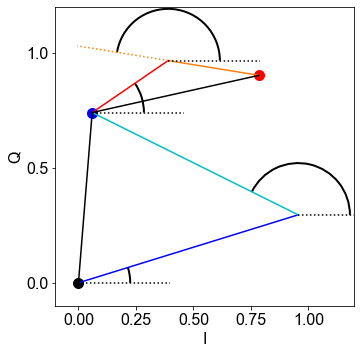

In [9]:
fig = plt.figure(figsize=[5.5,5.5])
ax = plt.gca() 
ax.set_aspect(1.0) 
plt.plot([0*I1,I1],[0*Q1,Q1], 'b', label = 'A')
plt.plot([I1+0*I3,I1+I3], [Q1+0*Q3, Q1+Q3], 'c', label = 'B')
plt.plot([I1+I3,I1+I3+I2],[Q1+Q3,Q1+Q3+Q2], 'r', label = 'cA')
plt.plot([I1+I3+I2,I1+I3+I2+I4], [Q1+Q3+Q2,Q1+Q3+Q2+Q4], color = 'tab:orange', label = '-cB')
plt.scatter([I1+I3+I2+I4], [Q1+Q3+Q2+Q4], color = 'red', s=100)
plt.plot([I1+I3+I2,I1+I3+I2-I4], [Q1+Q3+Q2,Q1+Q3+Q2-Q4], ':', color = 'tab:orange', label = 'cB')
plt.plot([0*I1,I1+I3],[0*Q1,Q1+Q3], color='black')
plt.plot([I1+I3,I1+I2+I3+I4],[Q1+Q3,Q1+Q2+Q3+Q4], color='black')
plt.plot([0,0.4],[0.0,0],':', color='black')
plt.plot([I1+I3, I1+I3+0.4],[Q1+Q3,Q1+Q3],':', color='black')
plt.plot([I1, I1+0.4],[Q1,Q1],':', color='black')
plt.plot([I1+I2+I3, I1+I2+I3+0.4],[Q1+Q2+Q3,Q1+Q2+Q3],':', color='black')
plt.scatter([I1+I3],[Q1+Q3], color = 'b', s=100)
plt.scatter(0,0, color = 'black',s=100)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
ax = fig.axes[0]
el1=Arc((0,0),width=0.45, height=0.45, theta1=0, theta2=alpha1*180/np.pi, linewidth=2)
el2=Arc((I1,Q1),width=0.45, height=0.45, theta1=0, theta2=alpha2*180/np.pi, linewidth=2)
el3=Arc((I1+I3,Q1+Q3),width=0.45, height=0.45, theta1=0, theta2=(alpha1+eps)*180/np.pi, linewidth=2)
el4=Arc((I1+I2+I3,Q1+Q2+Q3),width=0.45, height=0.45, theta1=0, theta2=(alpha2+eps)*180/np.pi, linewidth=2)
ax.add_patch(el1)
ax.add_patch(el2)
ax.add_patch(el3)
ax.add_patch(el4)
plt.xlabel('I')
plt.ylabel('Q')
plt.yticks([0, 0.5, 1])
plt.savefig('fig3a.pdf')

In [10]:
(alpha1+eps)*180/np.pi

34.37746770784939

### Fig 3(b)

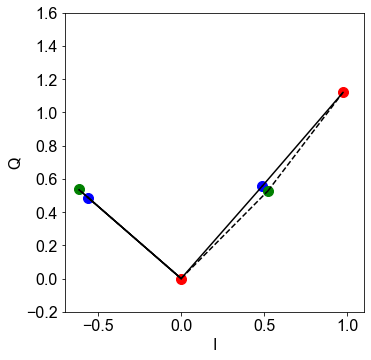

In [11]:
# simulate common phase noise. Common phase noise enters as a noise in delta
exp['eps'] = 0.3
exp['c'] = 0.4
exp['delta'] = np.array([-0.64, -0.70])
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)
I5 = I2+I4
I6 = I1+I3
Q5 = Q2+Q4
Q6 = Q1+Q3
fig = plt.figure(figsize=[5.5,5.5])
ax = plt.gca() 
ax.set_aspect(1.0) 
linestyle_list = ['solid', 'dashed']
for i in range(0,2):  
    plt.plot([0,I6[i]],[0,Q6[i]], color='black', linestyle = linestyle_list[i], label = 'A+B')
    plt.plot([I6[i],I6[i]+I5[i]],[Q6[i],Q6[i]+Q5[i]], color='black', linestyle = linestyle_list[i], label = 'c(A+B)')
plt.scatter(I6[0]+I5[0],Q6[0]+Q5[0], s=100, color = 'red')    
plt.scatter(I6[0], Q6[0], s=100, color = 'b')
plt.scatter(I6[1], Q6[1], s=100, color = 'g')

#plt.plot(I6, Q6, ':', color = 'black')
#plt.plot(0,0,'o', color = 'black')
# reference point
exp['eps'] = 0.3
exp['c'] = 0.4
exp['delta'] = -0.64
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)
plt.scatter([I1+I2+I3+I4], [Q1+Q2+Q3+Q4], s=40, facecolors='none', edgecolor='r')
#plt.savefig('fig3.pdf')

# vary common mode amplitude noise
exp['eps'] = 0.3+0.0 # simulate finite phase senisitivty
exp['c'] = 0.4
exp['delta'] = 0.935
exp['a1'] = np.array([1.0,1.1])
exp['a2'] = np.array([1.0,1.1])
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)
I5 = I2+I4
I6 = I1+I3
Q5 = Q2+Q4
Q6 = Q1+Q3
linestyle_list = ['solid', 'dashed']
for i in range(0,2):  
    plt.plot([0,I6[i]],[0,Q6[i]], color='black', linestyle = linestyle_list[i], label = 'A+B')
    plt.plot([I6[i],I6[i]+I5[i]],[Q6[i],Q6[i]+Q5[i]], color='black', linestyle = linestyle_list[i], label = 'c(A+B)')
plt.scatter(I6[0], Q6[0], color = 'b', s = 100)
plt.scatter(I6[1], Q6[1], color = 'g', s = 100)
plt.scatter(I6[0]+I5[0],Q6[0]+Q5[0], s = 100, color = 'red')    
plt.plot(I6, Q6, ':', color = 'black')
#plt.plot(0,0,'o', color = 'black')
# reference
exp['eps']= 0.3
exp['c'] = 0.4
exp['a1']=1.0
exp['a2']=1.0
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)
#plt.scatter([I1+I2+I3+I4], [Q1+Q2+Q3+Q4], s=120, facecolors='none', edgecolor='r')
plt.xlim([-0.7,1.1])
plt.ylim([-0.2,1.6])
plt.xlabel('I')
plt.ylabel('Q')
plt.savefig('fig3b.pdf')

In [12]:
dalpha(exp)

2.3805798993650633

## Figure 4

Measured signal variation ∆S for a common mode modulation of (a) the signal amplitude by one percent and (b) the signal phase by 0.01 radians. 

In [13]:
def cartesian_noise_fit3(x_data, y_data, v,  start=0, stop=51, center=25):

    x_noise = np.polyfit(v[start:stop], x_data[start:stop], 1)[0]
    y_noise = np.polyfit(v[start:stop], y_data[start:stop], 1)[0]
    mag_noise = np.sqrt(x_noise**2+y_noise**2)
    
    return {'x_noise': x_noise, 'y_noise': y_noise, 'mag_noise': mag_noise}

### Full map

#### Amplitude noise 

Here we vary commonly a1 and a2 and the fit for the slope of I and Q for different a2 and alpha2.

In [14]:
points_x = 50
points_y = 50

In [15]:
# load data
p_amp = np.loadtxt('amp_a.txt') # amplitude 1 on lockin (base is 10 mV, amplitude 2 is varied proportionally)
x_amp = np.loadtxt('amp_x.txt')
y_amp = np.loadtxt('amp_y.txt')

In [16]:
x_amp_noise = np.zeros([50*50])
y_amp_noise = np.zeros([50*50])
mag_amp_noise = np.zeros([50*50])

for i in range(points_x*points_y):
    fit = cartesian_noise_fit3(x_amp[i], y_amp[i], p_amp[i], start=4, stop=18)
    x_amp_noise[i] = fit['x_noise']
    y_amp_noise[i] = fit['y_noise']
    mag_amp_noise[i] = fit['mag_noise']

We find the minimum point: 

In [17]:
min_ind = np.where(mag_amp_noise == np.min(mag_amp_noise))
I_a = np.ravel(x_amp, 'F')[min_ind]
Q_a = np.ravel(y_amp, 'F')[min_ind]
print(I_a, Q_a)

[3.95021251e-05] [5.8096319e-05]


In [18]:
min_ind

(array([1272], dtype=int64),)

### phase noise 

Here we vary the voltage on the phase shifter and then fit for the slope of I and Q for different a2 and alpha2.

In [19]:
# load data
p_phase = np.loadtxt('pha_a.txt') # voltage on phase shifter
x_phase = np.loadtxt('pha_x.txt')
y_phase = np.loadtxt('pha_y.txt')

In [20]:
x_phase_noise = np.zeros([50*50])
y_phase_noise = np.zeros([50*50])
mag_phase_noise = np.zeros([50*50])

for i in range(50*50):
    fit = cartesian_noise_fit3(x_phase[i], y_phase[i], p_phase[i], start=3, stop=30)
    x_phase_noise[i] = fit['x_noise']
    y_phase_noise[i] = fit['y_noise']
    mag_phase_noise[i] = fit['mag_noise']

In [21]:
min_ind_phase = np.where(mag_phase_noise == np.min(mag_phase_noise))
print(min_ind_phase)

(array([1238], dtype=int64),)


In [22]:
mag_phase_noise_ssb  = 0.0009074170677818003
mag_amp_noise_ssb = 0.0755179622593864
phase_per_V = 1.2680082667547319
I_ssb = 0.000231660989547588
Q_ssb = 0.000725523956617512
I_ssb_p = 0.000253885460122336 # this is the measured value for I_ssb_p used for the calibration of the phase per V on phase shifter, not needed to plot data
Q_ssb_p = 0.000669073831572819

#### plot the figure

In [23]:
seismic = cm.get_cmap('seismic')#.resampled(256)
newcolors = seismic(np.concatenate((np.linspace(0, 0.5, 64),np.linspace(0.5, 1, 192))))
newcmp = ListedColormap(newcolors)

In [24]:
#font = {'family' : 'normal',
#        'weight': 'normal',
#        'size'   : 22}
#
#plt.rc('font', **font)
#
#SMALL_SIZE = 22
#MEDIUM_SIZE = 24
#BIGGER_SIZE = 24
#
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('lines', linewidth=3)
#plt.rcParams['mathtext.default'] = 'regular'

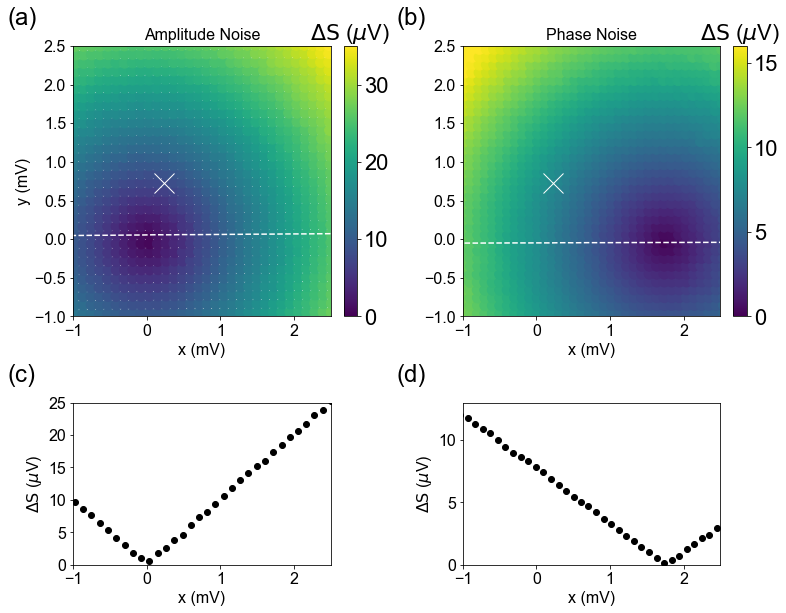

In [25]:
font = 22
bigfont = 24
gs_kw = dict(width_ratios=[1, 1], height_ratios=[2, 1.2])                              
fig, axs = plt.subplot_mosaic([['(a)','(b)'],['(c)', '(d)']], figsize=[10.8,8.4], gridspec_kw=gs_kw, constrained_layout=True)
for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = transforms.ScaledTranslation(-66/72, 16/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=bigfont, va='bottom')

cut_amp = np.arange(1250,1300)
cut_phase=np.arange(1200,1250)
pl1 = axs['(a)'].scatter(x_amp[:,11]*1000, y_amp[:,11]*1000, c=mag_amp_noise/10*1000, vmin=0, vmax=35, cmap='viridis', s= 110) # /10 because slope is for 10% change but we plot for a 1%
#pl1 = axs['(a)'].scatter(x_amp[:,11]*1000, y_amp[:,11]*1000, c=mag_amp_noise/10*1000, vmin=7, vmax=8, cmap='viridis', s= 110) # /10 because slope is for 10% change but we plot for a 1%
pl2 = axs['(b)'].scatter(x_phase[:,25]*1000, y_phase[:,25]*1000, c=mag_phase_noise/phase_per_V/100*1e6, vmin=0, vmax=16, cmap='viridis', s=110) # mag_phase_noise is per V, by dividing by phase per V we get noise per phase change
#pl2 = axs['(b)'].scatter(x_phase[:,25]*1000, y_phase[:,25]*1000, c=mag_phase_noise/phase_per_V/100*1e6, vmin=7, vmax=8, cmap='viridis', s=110) # mag_phase_noise is per V, by dividing by phase per V we get noise per phase change
axs['(a)'].plot(I_ssb*1e3, Q_ssb*1e3, 'wx', markersize=20)
axs['(a)'].plot(1000*x_amp[cut_amp,11], 1000*y_amp[cut_amp,11] ,'w--')
axs['(b)'].plot(I_ssb*1e3, Q_ssb*1e3, 'wx', markersize=20)
axs['(b)'].plot(1000*x_phase[cut_phase,11], 1000*y_phase[cut_phase,11] ,'w--')

cb1 = fig.colorbar(pl1, ax=axs['(a)'], ticks=[0,10, 20, 30])
cb2 = fig.colorbar(pl2, ax=axs['(b)'], ticks=[0, 5, 10, 15])
#cb2 = fig.colorbar(pl2, ax=axs['(b)'], ticks=[7.0, 7.5, 8.0])

#axs['(a)'].set_aspect(1.0)
axs['(a)'].set_xlabel('x (mV)')
#axs['(b)'].set_aspect(1.0)
axs['(b)'].set_xlabel('x (mV)')
axs['(c)'].set_xlabel('x (mV)')
axs['(a)'].set_ylabel('y (mV)')
axs['(c)'].set_ylabel(r'${\rm \Delta S}$ ($\mu$V)')
axs['(d)'].set_ylabel(r'${\rm \Delta S}$ ($\mu$V)')
axs['(a)'].set_title('Amplitude Noise')
axs['(d)'].set_xlabel('x (mV)')
axs['(a)'].tick_params(axis='both', which='major')
axs['(b)'].tick_params(axis='both', which='major')
axs['(b)'].set_title('Phase Noise')

axs['(a)'].set_xlim(-1, 2.5)
axs['(a)'].set_ylim(-1, 2.5)
axs['(b)'].set_xlim(-1, 2.5)
axs['(b)'].set_ylim(-1, 2.5)
axs['(c)'].set_xlim(-1, 2.5)
axs['(c)'].set_ylim(0, 25)
axs['(d)'].set_xlim(-1, 2.5)
axs['(d)'].set_ylim(0, 13)

cb1.ax.set_title(r'${\rm \Delta S}$ ($\mu$V)', fontsize=font)
cb2.ax.set_title(r'${\rm \Delta S}$ ($\mu$V)', fontsize=font)

cb1.ax.tick_params(labelsize=font)
cb2.ax.tick_params(labelsize=font)

axs['(c)'].plot(x_amp[cut_amp,11]*1000, mag_amp_noise[cut_amp]/10*1000, 'ko')
axs['(d)'].plot(x_phase[cut_phase,11]*1000, mag_phase_noise[cut_phase]/phase_per_V*10*1000, 'ko')

plt.savefig("Fig4.pdf", dpi=300, bbox_inches="tight")
plt.show()

#### Finding parameters where sweet spots are measured 

In [26]:
a1 = 0.01 # this is copied from the meas_protocol, i.e. from how the a1 and a2 values were set in the measurement
a2_max = 0.08*np.cos(45)
x= np.linspace(-a2_max, a2_max, 50)
y= np.linspace(-a2_max, a2_max, 50)
alpha2 = np.empty([len(y),len(x)])
a2 = np.empty([len(y), len(x)])
for i in range(len(y)):
    for j in range(len(x)):
        a2[i][j] = np.sqrt(x[j]**2 + y[i]**2)
        ang = np.arctan2(y[i], x[j]) 
        alpha2[i][j] = ang*180/np.pi - 34.9236

In [27]:
min_ind

(array([1272], dtype=int64),)

In [28]:
print(np.ravel(alpha2, 'F')[min_ind])
print(np.ravel(a2, 'F')[min_ind])

[-113.61366753]
[0.00437327]


In [29]:
print(np.ravel(alpha2, 'F')[min_ind_phase])
print(np.ravel(a2, 'F')[min_ind_phase])

[57.1974964]
[0.02317293]


## Figure 5

Spectroscopy of a resonator and comparison of SSB and SMI signal in the IQ plane.

### Load resonator data

In [30]:
f,xxx,yyy =  np.loadtxt('resonator_interferometer.csv',)

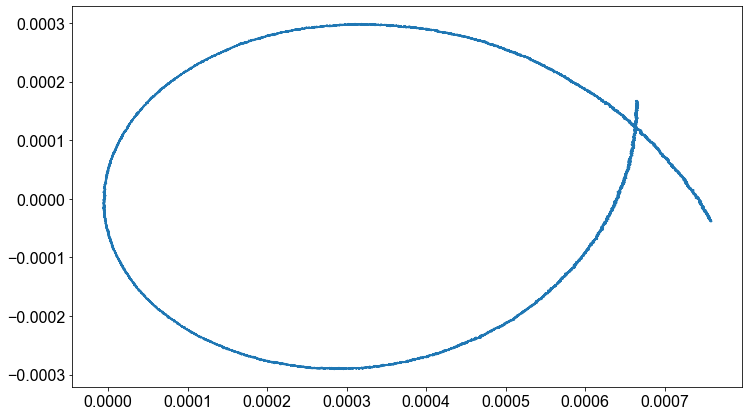

In [31]:
plt.plot(xxx,yyy)

### Resonator model

In [32]:
a  = 1.0
alpha = 0.0
tau = 0.0
phi = 0.0
fr = 6.16e9
f = np.linspace(fr-0.01e9, fr+0.01e9, 5001)
Qi = 51100
#Qi = 100000
#Qc = 9690
Qc = 9690
Ql = 1/(1/Qi + 1/Qc)
S21 = a*np.exp(1j*alpha)*np.exp(-1j*2*np.pi*f*tau)*(1-Ql/Qc*np.exp(1j*phi)/(1+2*1j*Ql*(f/fr-1)))
c = np.abs(S21)
eps = 1.1+np.angle(S21)

Qi = 51100
Qc = 9690
Ql = 1/(1/Qi + 1/Qc)
df = 50000
S21_f = a*np.exp(1j*alpha)*np.exp(-1j*2*np.pi*(f-df)*tau)*(1-Ql/Qc*np.exp(1j*phi)/(1+2*1j*Ql*((f-df)/fr-1)))

Qi = 51100/2
Qc = 9690
Ql = 1/(1/Qi + 1/Qc)
S21_Q = a*np.exp(1j*alpha)*np.exp(-1j*2*np.pi*f*tau)*(1-Ql/Qc*np.exp(1j*phi)/(1+2*1j*Ql*(f/fr-1)))


0.15940121730547774


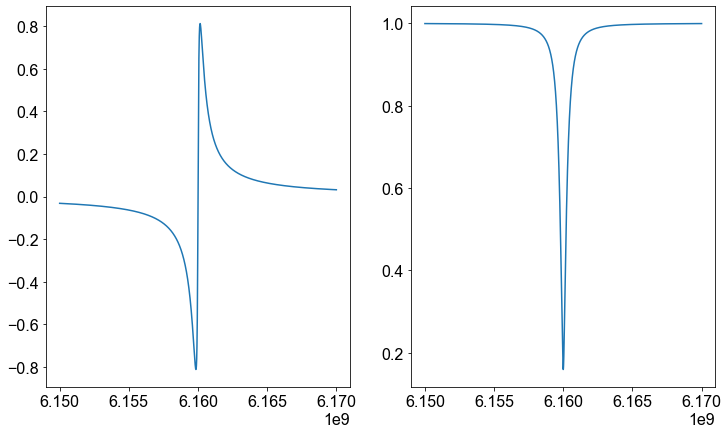

In [33]:
print(np.min((np.real(S21)**2+np.imag(S21)**2)**(0.5)))
fig, ax = plt.subplots(1,2)
ax[0].plot(f, np.angle(S21))
ax[1].plot(f, np.abs(S21))

In [34]:
print(f[2506], np.abs(S21[2506]), np.angle(S21[2506]))

6160024000.0 0.1712283872539883 0.3155523560898806


In [35]:
# choose optimal theta from equation.
c0 = 0.1712+0.01 # choose this as the calibration point where SMI is put to the point of amplitude noise suppresion
eps0 = 1.1+0.3155 

a1 = 1.0
a2 = 1.0
#c = 0.1594 # relative absorption of one sideband compared to other
#eps = 1.1 # relative phase shift of one sideband compared to other
c = c0
eps = eps0
delta = 0.0
alpha1 = 0.0
alpha2 = 0.0
chi1 = 0
chi2 = 0
exp = {'a1':a1, 'a2':a2, 'alpha1':alpha1, 'alpha2':alpha2, 'chi1':chi1, 'chi2':chi2, 'delta':delta, 'c':c, 'eps':eps}
tg = dalpha(exp)
exp['alpha2'] = exp['alpha1']-tg

### Find a2 and alpha2 to go get noise suppression

In [36]:
exp['alpha2']

-2.7830825840879476

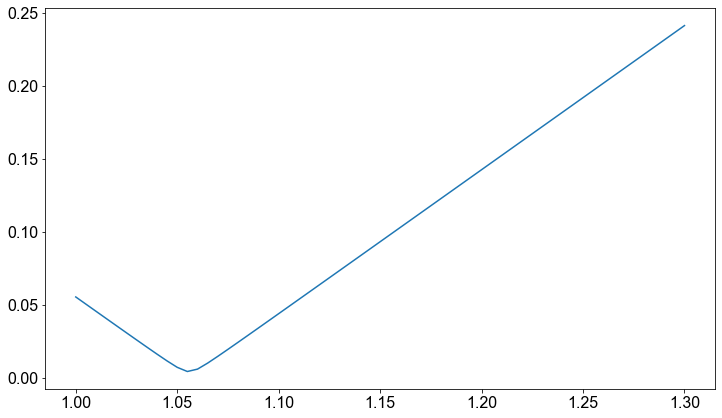

In [37]:
exp['a2'] = np.linspace(1.0, 1.3, 61)
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)
plt.plot(exp['a2'], np.sqrt((I1+I2+I3+I4)**2+(Q1+Q2+Q3+Q4)**2))

In [38]:
exp['a2'] = 1.055
tg = dalpha(exp)
exp['alpha2'] = exp['alpha1']-tg
print(exp['alpha2'])

-2.7869284271364405


3.4961466010286526


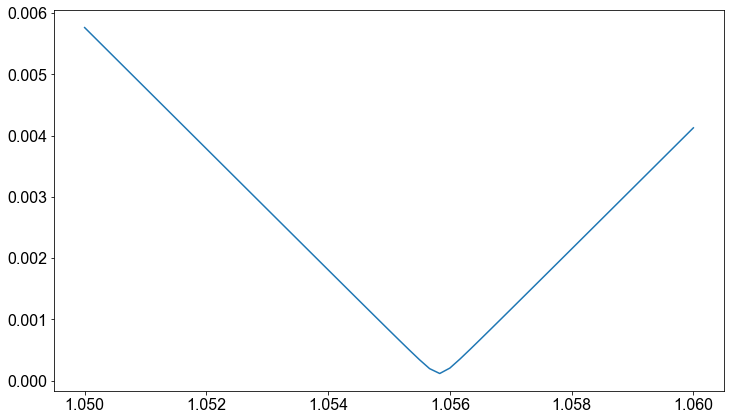

In [39]:
# next iteration
exp['a2'] = np.linspace(1.05, 1.06, 61)
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)
plt.plot(exp['a2'], np.sqrt((I1+I2+I3+I4)**2+(Q1+Q2+Q3+Q4)**2))
exp['a2'] = 1.0558
tg = dalpha(exp)
exp['alpha2'] = exp['alpha1']-tg
print(exp['alpha2']+2*np.pi)

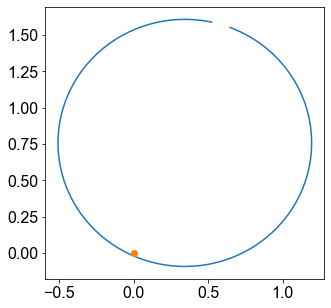

In [40]:
# plot resonance with SMI settings
exp['c'] = np.abs(S21)
exp['eps'] = 1.1+np.angle(S21)
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)
I = I1+I2+I3+I4
Q = Q1+Q2+Q3+Q4
plt.figure(figsize=[5,5])
plt.plot(I,Q)
plt.plot(0,0,'o')

In [41]:
# vary alpha2 and a2
# phase dependence
exp['c'] = c0
exp['eps'] = eps0
exp['alpha2'] = np.linspace(0, 2*np.pi, 301)
a2_list = np.linspace(0.01, 1.2, 101)
exp['delta'] = 0
ssm = np.zeros([301,101])
ssp = np.zeros([301,101])
xx = np.zeros([301,101])
yy = np.zeros([301,101])

for j,_ in enumerate(a2_list):
    exp['a2']=a2_list[j]
    exp['delta'] = 0.00
    I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp)
    exp['delta'] = 0.01
    J1,J2,J3,J4,K1,K2,K3,K4 = getinterference(exp)
    s = I1+I2+I3+I4-(J1+J2+J3+J4)
    m = Q1+Q2+Q3+Q4-(K1+K2+K3+K4)
    s1 = 0.01*(I1+I2+I3+I4)
    m1 = 0.01*(Q1+Q2+Q3+Q4)
    x = I1+I2+I3+I4
    y = Q1+Q2+Q3+Q4
    intf = np.sqrt((I2+I4)**2+(Q2+Q4)**2)-np.sqrt((I1+I3)**2+(Q1+Q3)**2) # 0 if two interfering terms have same length
    xn = x/np.sqrt(x**2+y**2)
    yn = y/np.sqrt(x**2+y**2)
    ssp[:,j] = np.sqrt(s**2+m**2)
    ssm[:,j] = np.sqrt(s1**2+m1**2)
    xx[:,j] = x
    yy[:,j] = y

In [42]:
ij_min_p = np.where(ssp == np.min(ssp))
ij_min_m = np.where(ssm == np.min(ssm))

In [43]:
print(ij_min_p[0][0], ij_min_p[1][0])
print(ij_min_m[0][0], ij_min_m[1][0])

133 78
167 88


In [44]:
ssp[ij_min_p[0][0], ij_min_p[1][0]]

6.220825757118987e-05

In [45]:
ssm[ij_min_m[0][0],ij_min_m[1][0]]

2.069617307724689e-05

In [46]:
alpha2_p = exp['alpha2'][ij_min_p[0][0]]
a2_p = a2_list[ij_min_p[1][0]]
alpha2_m = exp['alpha2'][ij_min_m[0][0]]
a2_m = a2_list[ij_min_m[1][0]]
print(alpha2_p, a2_p)
print(alpha2_m, a2_m)

2.78554548618295 0.9381999999999999
3.497639820996636 1.0572


In [47]:
alpha2_m = 3.4976
a2_m = 1.0572

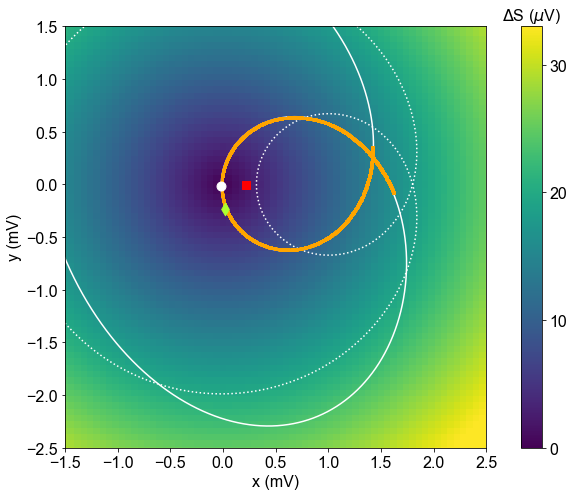

In [48]:
# vary alpha2 and a2
# within circles: vary alpha2
# different circles: vary a2
# phase dependence
plt.figure(figsize=[10,7])
ax = plt.gca() 
ax.set_aspect(1.0) 
exp['c']= c0
exp['eps'] = eps0
rangle = -1.1
a_x = np.linspace(-3, 3, 101)
a_y = np.linspace(-3, 3, 101)
a_x, a_y = np.meshgrid(a_x, a_y)
plt.pcolormesh(a_x, a_y, 1000*np.sqrt(((0.01*a_x)**2+(0.01*a_y)**2)),vmin=0, vmax=33, rasterized=True)
clb = plt.colorbar(ticks=[0,10,20,30])
clb.ax.set_title('$\Delta$S ($\mu$V)')


# plot resonator
exp['c'] = np.abs(S21)
exp['eps'] = 1.1+np.angle(S21)

# single sideband
exp['alpha2'] = np.pi
exp['a2']=1
exp['delta'] = np.linspace(-4.9,4.9,len(S21)) # electrical delay (fit by eye)
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp, rangle)
I = I1+I2+I3+I4
Q = Q1+Q2+Q3+Q4
plt.plot(I[1000:-1000],Q[1000:-1000], 'w:')

# SMI sweet spot for amplitude noise
exp['alpha2'] = alpha2_m
exp['a2'] =  a2_m
#exp['delta'] = np.linspace(-4.9, 4.9,len(S21)) # electrical delay (fit by eye)
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp,rangle)
I = I1+I2+I3+I4
Q = Q1+Q2+Q3+Q4
plt.plot(I[1000:-600],Q[1000:-600], 'w')

plt.xlim(-1.5,2.5)
plt.ylim(-2.5,1.5)
plt.xlabel('x (mV)')
plt.ylabel('y (mV)')
scalefactor = 2.14e3 # to match into the arbitrary choice of a1 and a2 amplitude
plt.plot(xxx*scalefactor, yyy*scalefactor, 'o', color='orange', markersize=2)
#plt.plot(0,0,'ow')
plt.scatter(I[2506], Q[2506], c='w', marker='o', s=80, zorder=5)

exp['c'] = np.abs(S21_f)
exp['eps'] = 1.1+np.angle(S21_f)
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp,rangle)
I = I1+I2+I3+I4
Q = Q1+Q2+Q3+Q4
plt.scatter(I[2506],Q[2506], marker = 'd', color='greenyellow', s=80, zorder=5)

exp['c'] = np.abs(S21_Q)
exp['eps'] = 1.1+np.angle(S21_Q)
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp,rangle)
I = I1+I2+I3+I4
Q = Q1+Q2+Q3+Q4
plt.scatter(I[2506],Q[2506],color='r', marker='s', s=80, zorder=1)
plt.tight_layout()
plt.savefig('Fig5.pdf')

## Figure 6

SMI measurement of frequency fluctuations of a test resonator. 

### Define Functions 

In [49]:
mlabels = ['−132dBm','−142dBm','−122dBm']

def phot_n(Pintop = -132, vr = 6.16e9):
    hbar = 1.054571817e-34 
    wr = vr*2*np.pi
    Ql = 8e3
    Qc = 9.8e3
    pindbm = Pintop
    pinw =  10**(pindbm / 10) / 1000 
    Zres = 316
    nnn = (2/(hbar*wr**2))*(Ql**2/Qc)*(50/Zres)*pinw
    return np.round(100*nnn)/100

def do_calibration(mlabel, start_sbi, stop_sbi, doplot = False):
    f_res, R_sbi, f_sbi, phi_sbi = np.loadtxt(mlabel+'_cal.csv')
    f_pna,mag_pna,phi_pna = np.loadtxt('-132dBm_pna.csv')
    start_pna = 490
    stop_pna = 515 
    f_FIT_pna = f_pna[start_pna:stop_pna] - np.mean(f_pna[start_pna:stop_pna])
    phi_FIT_pna = phi_pna[start_pna:stop_pna]
    f_FIT_sbi = f_sbi[start_sbi:stop_sbi] - np.mean(f_sbi[start_sbi:stop_sbi])
    phi_FIT_sbi = phi_sbi[start_sbi:stop_sbi]

    coef_pna = np.polyfit(f_FIT_pna, phi_FIT_pna, 1)
    coef_sbi = np.polyfit(f_FIT_sbi, phi_FIT_sbi, 1)

    poly1d_fn_pna = np.poly1d(coef_pna) 
    poly1d_fn_sbi = np.poly1d(coef_sbi)

    # calibration coefficient in rad\V
    VtoRad = (np.pi / 180) * coef_pna[0] / coef_sbi[0]
    degToHz = 1 / coef_sbi[0]

    print('Calibration constant for '+mlabel+': ', degToHz, ' Hz/deg')
    print('Photon number in resonator @ '+mlabel+': ',str(phot_n(-int(mlabel[1:].split('dBm')[0]))))
    if doplot:
        fig, axs = plt.subplots(2, 2, figsize=(12,7), constrained_layout=True)
        plt.setp(axs[0,0], ylabel='PNA phase shift [deg]')
        plt.setp(axs[0,0], xlabel='Frequency [GHz]')
        plt.setp(axs[0,1], ylabel='Demodulated phi [deg]')
        plt.setp(axs[0,1], xlabel='Frequency [GHz]')

        axs[0,0].plot(1e-9 * f_pna[200:800], phi_pna[200:800],'o');
        axs[0,1].plot(1e-9 * f_sbi,  phi_sbi,'o')

        plt.setp(axs[1,0], ylabel='PNA phase shift [deg]')
        plt.setp(axs[1,0], xlabel='Relative frequency [MHz]')
        plt.setp(axs[1,1], ylabel='Demodulated phi [deg]')
        plt.setp(axs[1,1], xlabel='Relative frequency [MHz]')

        axs[1,0].plot(f_FIT_pna / 1e6, phi_FIT_pna,'o');
        axs[1,0].plot(f_FIT_pna / 1e6, poly1d_fn_pna(f_FIT_pna))
        axs[1,1].plot(f_FIT_sbi / 1e6, phi_FIT_sbi,'o');
        axs[1,1].plot(f_FIT_sbi / 1e6, poly1d_fn_sbi(f_FIT_sbi));
    return degToHz

def plot_allan(plt, xa, ya, ea, na, ndiv = 10, label = None):
    mma = (xa<np.max(xa)/ndiv)
    plt.loglog(xa[mma],ya[mma], linewidth = 2, label = label)

def plot_psd(plt, xf, yf, linewidth=0.6, label="Noise PSD" ,ave = False, fitstart = 1, fitstop = 1000, a = None):
    ff = xf[1:]
    yy = yf[1:]
    #print(a)
    if ave:
        ffbins = np.geomspace(ff[0],ff[-1],num = ave, endpoint = True)
        bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(ff, yy, statistic=np.nanmean, bins=ffbins)
        bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
        good = [ii for ii in range(len(bin_means)) if not np.isnan(bin_means[ii])]
        plt.loglog(bin_centers[good], np.sqrt(bin_means[good]),linewidth=linewidth, label=label)
        if a == None:
            popt_s1, pcov_s1 = curve_fit(expo_fixed, bin_centers[good][fitstart:fitstop], bin_means[good][fitstart:fitstop],  p0=(1e3))
            a = popt_s1[0]
        else: 
            popt_s1 = [a]
        plt.loglog(xf[fitstart:fitstop], np.sqrt( expo_fixed(xf[fitstart:fitstop], *popt_s1) ), '--',linewidth=2 , label=r'$a_p\;=\;$'+''.join('{:.0e}'.format(a).split('+0'))+r'$\; Hz^2$')
        plt.loglog(ff, np.sqrt(yy),'C0', linewidth=0.5, alpha = 0.2, label=None)
        return a
    else:
        plt.loglog(ff, np.sqrt(yy),linewidth=linewidth, label=label)
        return None

def expo_fixed(x, a):
    return a * x**(-1)


def plot_two(mlabel = '-132dBm', fit_start = 1, a = None, fit_stop = 300000, start_sbi = 480, stop_sbi = 550, min_freq = -2, n_avg = 2, ave = 201):
    degToHz = do_calibration(mlabel, start_sbi, stop_sbi)
    phi = np.loadtxt(mlabel+'_phi.csv')
    t_dat = phi[0,:]
    f_dat = phi[1,:]*degToHz
    
    f_dat = f_dat-np.mean(f_dat)

    N = len(t_dat) // n_avg
    dt = t_dat[1] - t_dat[0]
    fs = 1/dt

    f_red = f_dat.reshape(n_avg, N)
    
    xf, yf = signal.periodogram(f_red, fs)
    yf = np.mean(yf, axis=0)
    xf = xf[:N]
    
    nTau = np.logspace(min_freq, np.ceil(np.log10(np.max(f_dat))), 101)
    (taus, adevs, errors, ns) = allantools.oadev(f_dat, rate=fs, taus=nTau, data_type='freq')
   
    taul = np.array([1./xf[fit_stop]/2/np.pi, 1./xf[fit_start]/2/np.pi])
    fig, axs = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)
    plt.setp(axs[0], ylabel='Spectral density [Hz/$\sqrt{\mathrm{Hz}}$]')
    plt.setp(axs[0], xlabel='Frequency [Hz]')
    plt.setp(axs[1], ylabel='Allan deviation $\sigma_f$ [Hz]')
    plt.setp(axs[1], xlabel='Tau [s]')
    a = plot_psd(axs[0], xf, yf,linewidth=2, label=r'$\sqrt{S_p}( f )$', ave = ave, fitstart = fit_start, fitstop = fit_stop, a = a)
    axs[0].legend();
    axs[0].set_ylim(1e1,1e6)
    axs[0].set_xlim(1e-4,5e1)
    plot_allan(axs[1], taus, adevs, errors, ns, ndiv = 2, label = r'Allan deviation $\sigma_f\;({\tau})$')
    axs[1].plot(taul,taul*0+np.sqrt(a*2*np.log(2)), '--',linewidth=2 ,label=r'$\sigma_f\;({\tau})=\sqrt{2ln(2)\; a_p}$')
    axs[1].set_ylim(1e2,2e4)
    axs[1].set_xlim(0.5e-2,5e3)
    axs[1].legend();


### Plot Figure

Calibration constant for −122dBm:  -2066.361595615448  Hz/deg
Photon number in resonator @ −122dBm:  8.25
Calibration constant for −122dBm:  -2066.361595615448  Hz/deg
Photon number in resonator @ −122dBm:  8.25


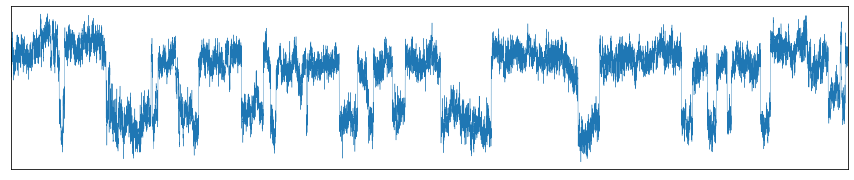

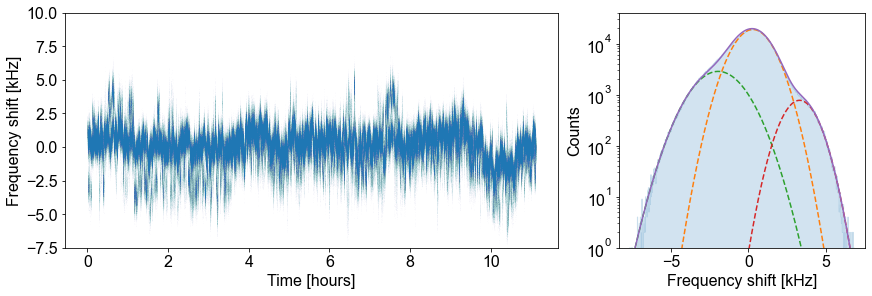

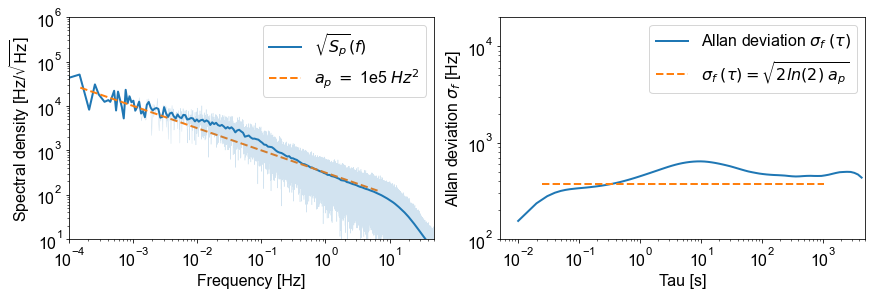

In [50]:
degToHz = degToHz = do_calibration('−122dBm', 480, 550)
phi = np.loadtxt('−122dBm_phi.csv')
t_dat = phi[0,:]
f_dat = phi[1,:]*degToHz
f_dat = f_dat-np.mean(f_dat)

fig, ax = plt.subplots(1,1, figsize = (15,3))
ax.plot(t_dat[410000:450000]-t_dat[410000],f_dat[410000:450000],linewidth = 0.4)
ax.set_xlim(1,400)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('zoom.jpg', dpi = 400)
fig, axs = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True, gridspec_kw={'width_ratios': [2, 1]})
axs[0].plot(t_dat/60/60, 1e-3 * f_dat,'.',markersize=0.01, alpha = 0.7)
axs[0].set_ylim(-7.5,10.0)
plt.setp(axs[0], xlabel='Time [hours]')
plt.setp(axs[0], ylabel='Frequency shift [kHz]')

# fit of the noise distribution
def gaus(x,a,x0_a,sigma_a):
    g = a*np.exp(-(x-x0_a)**2/(2*sigma_a**2))    
    return g

counts, bins, bars = axs[1].hist(1e-3 * f_dat, bins=1000, histtype='step',fill=True, alpha=0.2 );

p1,c1 = curve_fit(gaus,bins[500:700],counts[500:700],p0=[1.8e4,1.8e-1,1.2])
p2,c2 = curve_fit(gaus,bins[1:200],counts[1:200],p0=[3e3,-2,1.3])
p3,c3 = curve_fit(gaus,bins[800:1000],counts[800:1000],p0=[2e2,1,1.2])

axs[1].plot(bins, gaus(bins,*p1), "--")
axs[1].plot(bins, gaus(bins,*p2), "--")
axs[1].plot(bins, gaus(bins,*p3), "--")
axs[1].plot(bins, gaus(bins,*p1) + gaus(bins,*p2) + gaus(bins,*p3))


plt.ylim(1,4e4)
plt.yscale("log")
plt.setp(axs[1], xlabel='Frequency shift [kHz]')
plt.setp(axs[1], ylabel='Counts');
plt.savefig('hist.jpg', dpi = 400)

mlabel = mlabels[2]
plot_two(mlabel, fit_start = 3, fit_stop = 130000, a = 0.1e6, n_avg = 2, ave = 201) # -132dBm
plt.savefig('pin'+mlabel+'.jpg',dpi = 400)

## Figure 7

In [51]:
df = pd.read_csv('sidebandMod_1204_0dB_toRes_ncr.csv', header=None)
SH_f = df.loc[:,0]
SH_p = df.loc[:,1]

In [52]:
f_fit = np.loadtxt('pna_f.txt')
mag_fit = np.loadtxt('pna_mag.txt')
phi_nl = np.loadtxt('pna_phase.txt')

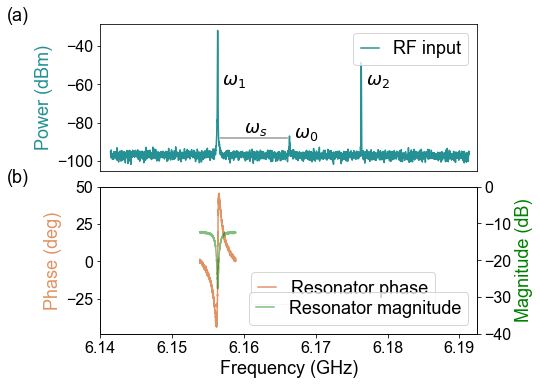

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(7,5), constrained_layout=True)
fmin = 6.14
fmax = 6.1925
fig.text(-0.05, 1, "(a)", fontsize=18)
fig.text(-0.05, 0.55, "(b)", fontsize=18)
ax[0].plot(SH_f / 1e3, SH_p, label="RF input", c="#259194")
ax[0].set_xticks([])
ax[0].set_xlim([fmin,fmax])
ax[0].set_ylabel("Power (dBm)", fontsize=18, c="#259194")
ax[0].legend(loc='upper right',handlelength=1, fontsize=18)

# text
ax[0].text(6.157, -60, '$\omega_1$', fontsize=18)
ax[0].text(6.177, -60, '$\omega_2$', fontsize=18)
ax[0].text(6.167, -88, '$\omega_0$', fontsize=18)
ax[0].text(6.16, -85, '$\omega_s$', fontsize=18)
ax[0].arrow(6.1566, -88, 0.005, 0, color='black', alpha=0.3)

ax[1].plot(f_fit / 1e9, phi_nl, label="Resonator phase", c='#E09465')
ax12 = ax[1].twinx()
ax12.plot(f_fit / 1e9, mag_fit, label="Resonator magnitude", c='g', alpha=0.5)
ax12.set_ylim([-40,0])
ax12.set_ylabel("Magnitude (dB)", fontsize=18, c='g')
ax12.legend(handlelength=1, fontsize=18, loc='lower right')

#ax[1].set_yticks([])
ax[1].set_ylabel("Phase (deg)", fontsize=18, c='#E09465')
ax[1].set_xlim([fmin, fmax])
ax[1].set_xlabel("Frequency (GHz)", fontsize=18)
ax[1].legend(handlelength=1, fontsize=18, loc=(0.4,0.2))

plt.savefig('fig7.pdf', dpi=300, bbox_inches='tight')

## Figure 8 

no data only drawings

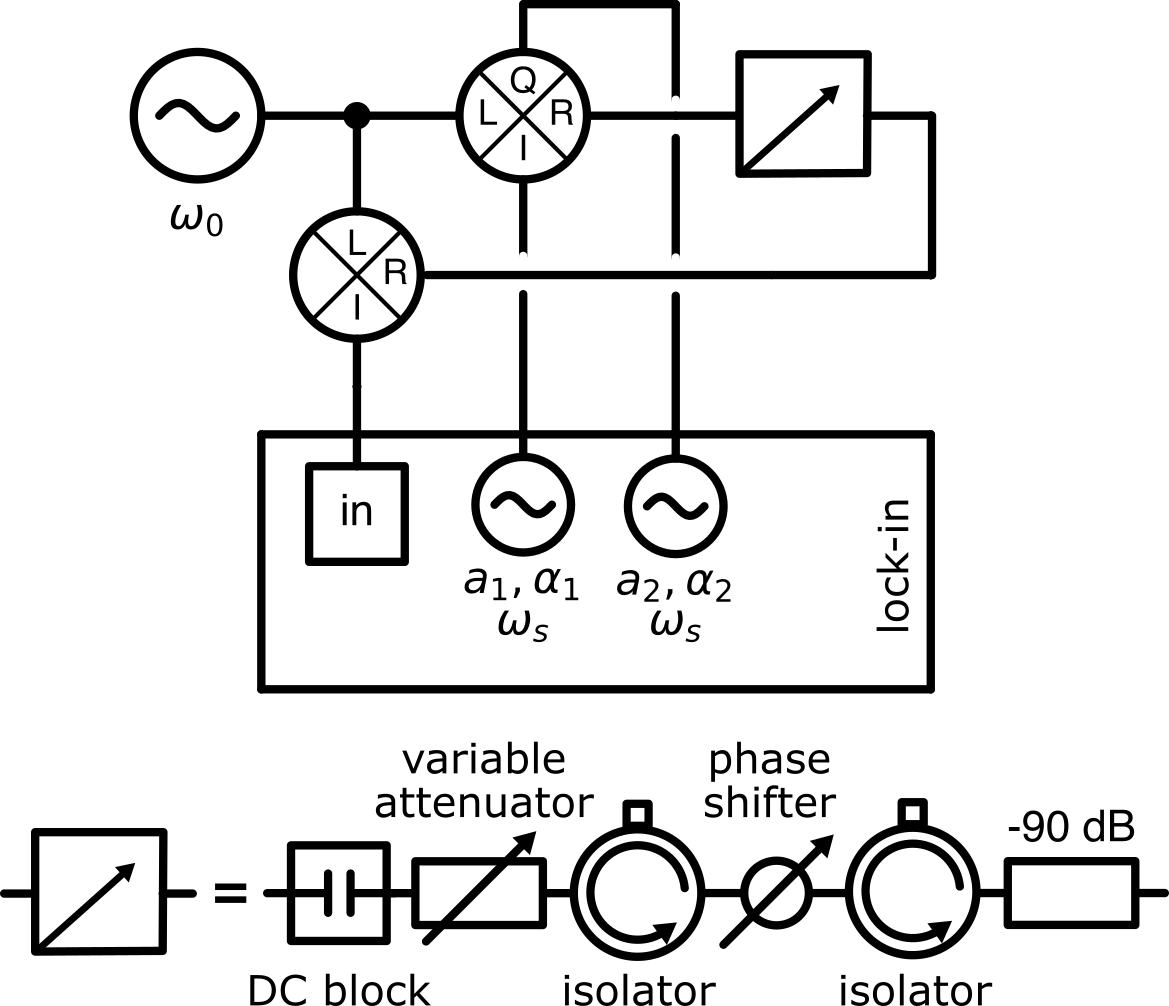

## Figure 9 

In [54]:
# SMI sensitivity on 0.01 rad common mode phase or 1% amplitude noise
exp['c'] = np.abs(S21)
exp['eps'] = 1.1+np.angle(S21)
exp['alpha2'] = alpha2_m
exp['a2'] =  a2_m
exp['delta'] = np.linspace(-4.9, 4.9,len(S21))
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp,rangle)
I_SMI = I1+I2+I3+I4
Q_SMI = Q1+Q2+Q3+Q4
exp['delta'] = np.linspace(-4.9, 4.9,len(S21)) + 0.01 
J1,J2,J3,J4,K1,K2,K3,K4 = getinterference(exp, rangle)
sp_SMI = I1+I2+I3+I4-(J1+J2+J3+J4)
mp_SMI = Q1+Q2+Q3+Q4-(K1+K2+K3+K4)
sa_SMI = 0.01*(I1+I2+I3+I4)
ma_SMI = 0.01*(Q1+Q2+Q3+Q4)

# single sideband (SSB)
exp['alpha2'] = np.pi
exp['a2'] = 1
exp['delta'] = np.linspace(-4.9,4.9,len(S21))
I1,I2,I3,I4,Q1,Q2,Q3,Q4 = getinterference(exp, rangle)
I_SSB = I1+I2+I3+I4
Q_SSB = Q1+Q2+Q3+Q4
exp['delta'] = np.linspace(-4.9, 4.9,len(S21)) + 0.01 
J1,J2,J3,J4,K1,K2,K3,K4 = getinterference(exp, rangle)
sp_SSB = I1+I2+I3+I4-(J1+J2+J3+J4)
mp_SSB = Q1+Q2+Q3+Q4-(K1+K2+K3+K4)
sa_SSB = 0.01*(I1+I2+I3+I4)
ma_SSB = 0.01*(Q1+Q2+Q3+Q4)

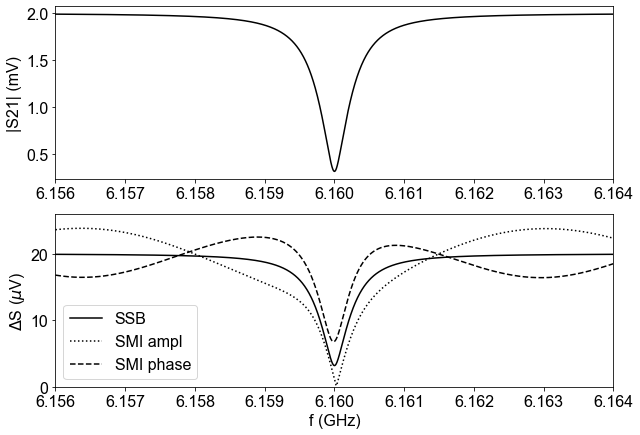

In [55]:
# compare common mode sensitivity at sweet spot and at single sideband
fig, ax = plt.subplots(2,1, figsize=[10,7])
idx = np.arange(1500,3500)
ax[0].plot(1e-9*f[idx], 2*np.sqrt(np.real(S21[idx])**2+np.imag(S21[idx])**2), 'k')
#ax[0].plot(1e-9*f[idx], np.sqrt(I_SSB[idx]**2+Q_SSB[idx]**2)/2)
ax[0].set_ylabel('|S21| (mV)')
ax[0].set_xlim(6.156, 6.164)
ax[1].plot(1e-9*f[idx], 1000*np.sqrt(sa_SSB[idx]**2+ma_SSB[idx]**2), 'k', label='SSB')
ax[1].plot(1e-9*f[idx], 1000*np.sqrt(sa_SMI[idx]**2+ma_SMI[idx]**2), 'k:', label='SMI ampl')
ax[1].plot(1e-9*f[idx], 1000*np.sqrt(sp_SMI[idx]**2+mp_SMI[idx]**2), 'k--', label='SMI phase')
#ax[1].plot(1e-9*f[idx], np.sqrt(sp_SSB[idx]**2+mp_SSB[idx]**2)/2, label='phase') phase is same as amplitude!
ax[1].legend()
ax[1].set_xlabel('f (GHz)')
ax[1].set_ylabel('$\Delta$S ($\mu$V)')
ax[1].set_ylim(0,26)
ax[1].set_xlim(6.156, 6.164)
plt.savefig('Fig_suppl.pdf')

## Figure 10 

Measured spectral densities (a, b, c) and Allan deviations (d, e, f)

Calibration constant for −132dBm:  -115.3161739021886  Hz/deg
Photon number in resonator @ −132dBm:  0.83


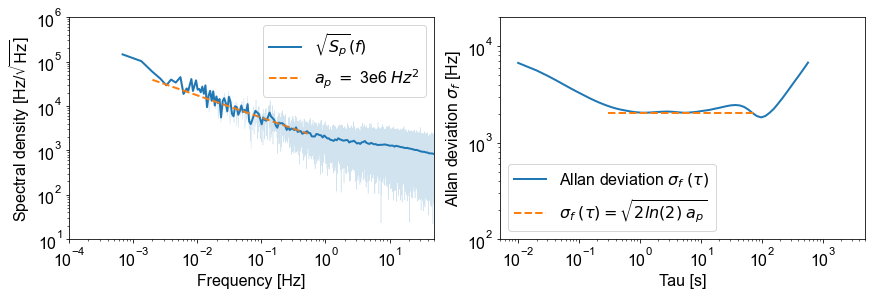

In [56]:
mlabel = mlabels[0]
plot_two(mlabel, fit_start = 3, fit_stop = 800, start_sbi = 983, stop_sbi = 1000, a = 3e6, n_avg = 2, ave = 201) # -132dBm
plt.savefig('pin'+mlabel+'.jpg',dpi = 400)

Calibration constant for −142dBm:  -2903.7936437314597  Hz/deg
Photon number in resonator @ −142dBm:  0.08


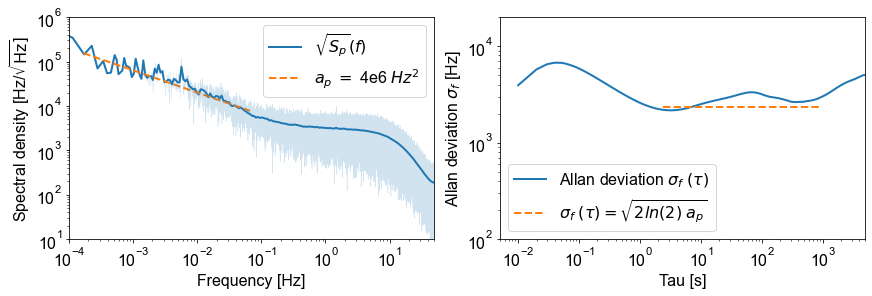

In [57]:
mlabel = mlabels[1]
plot_two(mlabel, fit_start = 3, fit_stop = 1200, a = 4e6, n_avg = 2, ave = 201) # -132dBm
plt.savefig('pin'+mlabel+'.jpg',dpi = 400)

Calibration constant for −122dBm:  -2066.361595615448  Hz/deg
Photon number in resonator @ −122dBm:  8.25


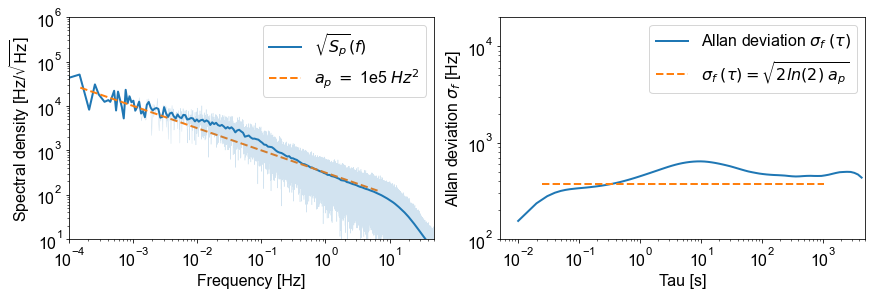

In [58]:
mlabel = mlabels[2]
plot_two(mlabel, fit_start = 3, fit_stop = 130000, a = 0.1e6, n_avg = 2, ave = 201) # -132dBm
plt.savefig('pin'+mlabel+'.jpg',dpi = 400)